<a href="https://colab.research.google.com/github/azizfath/bddm3/blob/main/20_11_3694_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UAS BIG DATA & DATA MINING**
##"Cervical Cancer Prediction by Classification using Support Vector Machines Algorithm"

# Identitas


*   **Nim: 20.11.3694**
*   **Nama: Fathurrahman Nur Aziz**
*   **Kelas: 20IF07**




#Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn import svm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#LOAD DATASET

*   DATAFRAME diambil dari KAGGLE : https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification
*   Kemudian saya taruh di github untuk mempermudah proses import : https://raw.githubusercontent.com/azizfath/bddm3/main/uas/kag_risk_factors_cervical_cancer.csv'


In [2]:
url = 'https://raw.githubusercontent.com/azizfath/bddm3/main/uas/kag_risk_factors_cervical_cancer.csv'
#url = '/content/kag_risk_factors_cervical_cancer.csv'

df = pd.read_csv(url)

## 1. Data Visualization

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.shape

(858, 36)

In [5]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

## 2. Data Preprocessing (Data Cleaning)

####Dari Dataset tersebut, terlihat ada data yang berisi "?", kita lakukan preprocessing terlebih dahulu untuk seluruh data "?"

In [6]:
#mengubah data "?" menjadi Null Values dan ubah jadi -1
for col in df.columns:
    df[col].replace('?',np.nan,inplace=True )
    df[col].fillna(value=-1,inplace=True)

In [7]:
#mengisi Null Values yang telah telah diubah menjadi -1 dengan Median
for col in df.columns:
    df[col].replace(-1,df[col].median(),inplace=True)

In [8]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,-1.0,-1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0


In [9]:
#cek null pada data yang sudah dibersihkan
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [10]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

Kita biarkan terlebih dahulu data yang berupa object karena belum tentu akan digunakan

##3. Exploratory Data Analysis

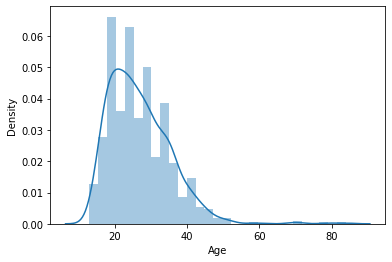

In [11]:
#melihat potensi kanker serviks berdasar umur
sns.distplot(df['Age'])

Dari data tersebut, sebaran kanker serviks banyak terjadi di umur 20-40. Maka pada clasifikasi ini kita akan melakukan prediksi yang berkaitan dengan umur.

##4. Feature Selection

In [12]:
#membuat dataframe baru berisi jenis test yang dijalani
df_cancer_test=pd.DataFrame(df[['Hinselmann','Schiller','Citology','Biopsy']])
df_cancer_test.head()

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


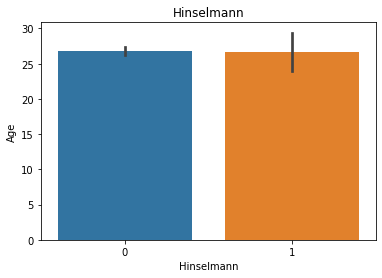

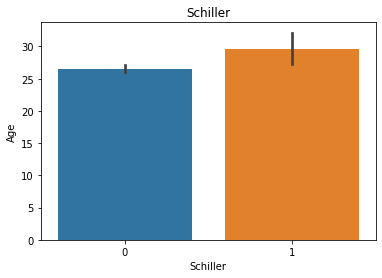

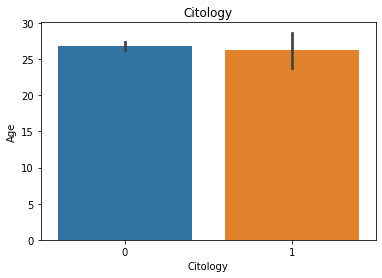

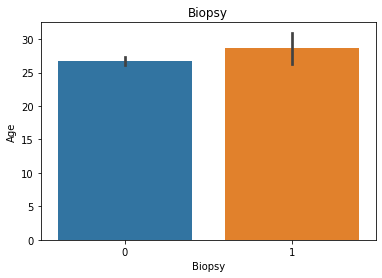

In [13]:
#melihat umur yang terdiagnosis cancer dari 4 test yang dijalani

for col in df_cancer_test.columns:
    s=df.copy()
    sns.barplot(x=s[col],y=df['Age'])
    plt.xlabel(col)
    plt.ylabel("Age")
    plt.title(col)
    plt.show()

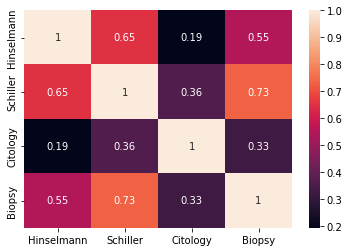

In [14]:
#Mencari korelasi dari 4 jenis test cancer
sns.heatmap(df_cancer_test.corr(),annot=True)

Fitur yang akan digunakan ada kolom, sehingga kita bisa menjumlahkan baris pada kolom tersebut. Nantinya, jika penjumlahan 4 kolom tersebut menghasilkan > 0 maka dia terkena cancer

In [15]:
#menjumlahkan 4 kolom test
df_cancer_test['count']=df_cancer_test['Hinselmann']\
                        +df_cancer_test['Schiller']\
                        +df_cancer_test['Citology']\
                        +df_cancer_test['Biopsy']

In [16]:
#melihat banyaknya hasil penjumlahan
df_cancer_test['count'].value_counts()

0    756
1     41
3     33
2     22
4      6
Name: count, dtype: int64

In [17]:
#memberikan label, jika > 0 maka dianggap cancer (=1)
df_cancer_test['result']=np.where(df_cancer_test['count']>0,1,df_cancer_test['count'])

#drop column count karena sudah tidak dipakai
df_cancer_test.drop(columns=['count'], inplace=True)

In [18]:
#melihat banyaknya hasil pelabelan
df_cancer_test['result'].value_counts()

0    756
1    102
Name: result, dtype: int64

##5. Classification Model and Prediction

In [19]:
#mengubah dataframe yang sudah diseleksi menjadi fitur dan target

#X -> independent var (fitur)
X = df_cancer_test.iloc[:,[0,1,2,3]].values

#y -> dependent var (target)
y = df_cancer_test.iloc[:,-1].values

In [20]:
#menampilkan 10 nilai awal X dan y
print(f'X: \n {X[:10]}')
print(f'y: \n {y[:10]}')

X: 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
y: 
 [0 0 0 0 0 0 1 0 0 0]


In [21]:
#split dataset dengan test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#print bentuk dari hasil data split
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (686, 4)
X_test shape:  (172, 4)
y_train shape:  (686,)
y_test shape:  (172,)


In [23]:
#membuat model klasifikasi dengan SVM
classifierSVM= svm.SVC(kernel='linear')

In [24]:
#training model klasifikasi
classifierSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
#melakukan prediksi
SVM_pred = classifierSVM.predict(X_test)

In [26]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t cancer');
for i,y in enumerate(SVM_pred[:15]):
  print(f'{i} \t {y}')

index 	 cancer
0 	 0
1 	 0
2 	 0
3 	 1
4 	 0
5 	 0
6 	 0
7 	 0
8 	 0
9 	 0
10 	 0
11 	 1
12 	 0
13 	 0
14 	 0


## 6. Model Evaluation

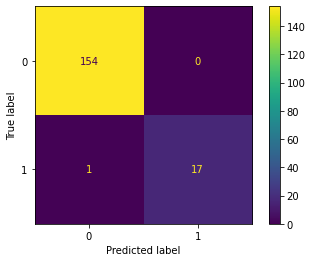

In [27]:
#menampilkan confussion matrix antara Naive Bayes
plot_confusion_matrix(classifierSVM,X_test,y_test)
plt.show()

In [28]:
#menampilkan classification report untuk SVM Classification
print('-------------------------------------------------------')
print('Classification Report for SVM Classification')
print('-------------------------------------------------------')
print(classification_report(y_test,SVM_pred,zero_division=0))

-------------------------------------------------------
Classification Report for SVM Classification
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      0.94      0.97        18

    accuracy                           0.99       172
   macro avg       1.00      0.97      0.98       172
weighted avg       0.99      0.99      0.99       172



###ANALISIS

Berdasarkan Confusion Matrix, maka klasifikasi tersebut menghasilkan:

* True Negative : 154
* True Positive : 17
* False Positive : 0
* False Negative : 1

**Maka dapat dikatakan bahwa klasifikasi tersebut dapat benar-benar melakukan prediksi positif ataupun negatif karena nilai false nya sangat sedikit**

Berdasarkan Classification Report, maka klasifikasi tersebut menghasilkan: 
* Akurasi : 99%
* Nilai Presisi Negatif : 99%
* Nilai Presisi Positif : 100%
* Nilai Recall Negatif : 100%
* Nilai Recall Positif : 94%

Artinya: 
* **Berdasakan nilai presisi, maka Algoritma SVM telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif dengan prediksi yang dilakukan (99% dan 100%)**
* **Berdasarkan nilai Recall, maka Algoritma SVM telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif yang sesuai dengan class sebenarnya (100% dan 94%)**
* **Nilai akurasi yang cukup tinggi (99%) mengindikasikan bahwa klasifikasi dataset tersebut dengan SVM telah menghasilkan prediksi class yang baik**